# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 19524 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)


  0% (    1 of 19524) |             | Elapsed Time: 0:00:04 ETA:  1 day, 2:10:49

  0% (   61 of 19524) |                    | Elapsed Time: 0:00:05 ETA:  0:05:31

  0% (  183 of 19524) |                    | Elapsed Time: 0:00:06 ETA:  0:03:31

  1% (  224 of 19524) |                    | Elapsed Time: 0:00:07 ETA:  0:04:27

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:08 ETA:  0:04:59

  1% (  319 of 19524) |                    | Elapsed Time: 0:00:09 ETA:  0:04:50

  1% (  381 of 19524) |                    | Elapsed Time: 0:00:10 ETA:  0:04:52

  2% (  464 of 19524) |                    | Elapsed Time: 0:00:11 ETA:  0:04:39

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:11 ETA:  0:04:33

  3% (  607 of 19524) |                    | Elapsed Time: 0:00:12 ETA:  0:04:08

  3% (  704 of 19524) |                    | Elapsed Time: 0:00:13 ETA:  0:03:51

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:14 ETA:  0:04:06

  4% (  850 of 19524) |                    | Elapsed Time: 0:00:15 ETA:  0:03:30

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:16 ETA:  0:02:59

  5% ( 1103 of 19524) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:41

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:18 ETA:  0:02:30

  6% ( 1352 of 19524) |#                   | Elapsed Time: 0:00:19 ETA:  0:02:26

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:20 ETA:  0:02:22

  7% ( 1541 of 19524) |#                   | Elapsed Time: 0:00:21 ETA:  0:02:29

  8% ( 1650 of 19524) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:30

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:31

  9% ( 1818 of 19524) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:31

  9% ( 1929 of 19524) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:33

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:25 ETA:  0:02:36

 10% ( 2061 of 19524) |##                  | Elapsed Time: 0:00:26 ETA:  0:02:41

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:00:27 ETA:  0:02:37

 11% ( 2298 of 19524) |##                  | Elapsed Time: 0:00:28 ETA:  0:02:29

 12% ( 2404 of 19524) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:29

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:00:29 ETA:  0:02:28

 13% ( 2552 of 19524) |##                  | Elapsed Time: 0:00:30 ETA:  0:02:27

 13% ( 2642 of 19524) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:31

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:32

 14% ( 2788 of 19524) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:32

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:00:34 ETA:  0:02:31

 15% ( 3037 of 19524) |###                 | Elapsed Time: 0:00:35 ETA:  0:02:28

 15% ( 3120 of 19524) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:33

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:00:36 ETA:  0:02:37

 16% ( 3289 of 19524) |###                 | Elapsed Time: 0:00:37 ETA:  0:02:35

 17% ( 3391 of 19524) |###                 | Elapsed Time: 0:00:38 ETA:  0:02:31

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:00:39 ETA:  0:02:30

 18% ( 3545 of 19524) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:23

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:00:41 ETA:  0:02:21

 19% ( 3772 of 19524) |###                 | Elapsed Time: 0:00:42 ETA:  0:02:25

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:00:43 ETA:  0:02:15

 20% ( 4033 of 19524) |####                | Elapsed Time: 0:00:44 ETA:  0:02:06

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:00:45 ETA:  0:02:04

 21% ( 4256 of 19524) |####                | Elapsed Time: 0:00:46 ETA:  0:02:04

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:00:47 ETA:  0:02:08

 22% ( 4488 of 19524) |####                | Elapsed Time: 0:00:48 ETA:  0:02:04

 23% ( 4599 of 19524) |####                | Elapsed Time: 0:00:49 ETA:  0:02:06

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:00:49 ETA:  0:02:06

 24% ( 4745 of 19524) |####                | Elapsed Time: 0:00:50 ETA:  0:02:10

 24% ( 4848 of 19524) |####                | Elapsed Time: 0:00:51 ETA:  0:02:11

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:11

 25% ( 4996 of 19524) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:08

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:08

 26% ( 5235 of 19524) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:04

 27% ( 5325 of 19524) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:08

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:00:57 ETA:  0:02:11

 28% ( 5478 of 19524) |#####               | Elapsed Time: 0:00:58 ETA:  0:02:10

 28% ( 5574 of 19524) |#####               | Elapsed Time: 0:00:59 ETA:  0:02:11

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:00:59 ETA:  0:02:09

 29% ( 5734 of 19524) |#####               | Elapsed Time: 0:01:00 ETA:  0:02:07

 29% ( 5823 of 19524) |#####               | Elapsed Time: 0:01:01 ETA:  0:02:11

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:01 ETA:  0:02:13

 30% ( 5972 of 19524) |######              | Elapsed Time: 0:01:02 ETA:  0:02:10

 31% ( 6083 of 19524) |######              | Elapsed Time: 0:01:03 ETA:  0:02:04

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:04 ETA:  0:02:03

 31% ( 6197 of 19524) |######              | Elapsed Time: 0:01:05 ETA:  0:02:16

 32% ( 6321 of 19524) |######              | Elapsed Time: 0:01:06 ETA:  0:02:07

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:01:06 ETA:  0:02:09

 32% ( 6414 of 19524) |######              | Elapsed Time: 0:01:07 ETA:  0:02:23

 33% ( 6531 of 19524) |######              | Elapsed Time: 0:01:08 ETA:  0:02:13

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:01:09 ETA:  0:02:08

 34% ( 6708 of 19524) |######              | Elapsed Time: 0:01:10 ETA:  0:02:06

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:01:11 ETA:  0:02:02

 35% ( 6952 of 19524) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:44

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:47

 36% ( 7197 of 19524) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:34

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:35

 38% ( 7446 of 19524) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:33

 38% ( 7546 of 19524) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:37

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:38

 39% ( 7665 of 19524) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:42

 39% ( 7779 of 19524) |#######             | Elapsed Time: 0:01:19 ETA:  0:01:38

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:01:20 ETA:  0:01:37

 40% ( 7937 of 19524) |########            | Elapsed Time: 0:01:21 ETA:  0:01:35

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:01:22 ETA:  0:01:32

 41% ( 8184 of 19524) |########            | Elapsed Time: 0:01:23 ETA:  0:01:27

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:01:24 ETA:  0:01:25

 43% ( 8414 of 19524) |########            | Elapsed Time: 0:01:25 ETA:  0:01:20

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:01:26 ETA:  0:01:13

 44% ( 8659 of 19524) |########            | Elapsed Time: 0:01:27 ETA:  0:01:11

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:01:28 ETA:  0:01:12

 45% ( 8897 of 19524) |#########           | Elapsed Time: 0:01:29 ETA:  0:01:14

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:17

 46% ( 9160 of 19524) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:13

 47% ( 9237 of 19524) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:26

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:26

 48% ( 9394 of 19524) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:24

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:26

 49% ( 9633 of 19524) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:24

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:01:37 ETA:  0:01:21

 50% ( 9887 of 19524) |##########          | Elapsed Time: 0:01:38 ETA:  0:01:22

 51% (10007 of 19524) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:10

 51% (10124 of 19524) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:10

 52% (10251 of 19524) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:08

 53% (10366 of 19524) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:07

 53% (10466 of 19524) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:13

 53% (10495 of 19524) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:13

 54% (10628 of 19524) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:09

 55% (10739 of 19524) |###########         | Elapsed Time: 0:01:45 ETA:  0:01:04

 55% (10864 of 19524) |###########         | Elapsed Time: 0:01:46 ETA:  0:01:00

 56% (10983 of 19524) |###########         | Elapsed Time: 0:01:47 ETA:  0:00:57

 56% (11093 of 19524) |###########         | Elapsed Time: 0:01:48 ETA:  0:00:58

 57% (11227 of 19524) |###########         | Elapsed Time: 0:01:49 ETA:  0:00:53

 58% (11346 of 19524) |###########         | Elapsed Time: 0:01:50 ETA:  0:00:52

 58% (11471 of 19524) |###########         | Elapsed Time: 0:01:51 ETA:  0:00:58

 59% (11593 of 19524) |###########         | Elapsed Time: 0:01:52 ETA:  0:00:58

 60% (11715 of 19524) |############        | Elapsed Time: 0:01:53 ETA:  0:00:56

 60% (11832 of 19524) |############        | Elapsed Time: 0:01:54 ETA:  0:00:53

 61% (11959 of 19524) |############        | Elapsed Time: 0:01:56 ETA:  0:00:51

 61% (12075 of 19524) |############        | Elapsed Time: 0:01:57 ETA:  0:00:51

 62% (12203 of 19524) |############        | Elapsed Time: 0:01:58 ETA:  0:00:45

 63% (12305 of 19524) |############        | Elapsed Time: 0:01:59 ETA:  0:00:47

 63% (12416 of 19524) |############        | Elapsed Time: 0:02:00 ETA:  0:00:49

 63% (12447 of 19524) |############        | Elapsed Time: 0:02:00 ETA:  0:00:49

 64% (12547 of 19524) |############        | Elapsed Time: 0:02:01 ETA:  0:00:51

 64% (12663 of 19524) |############        | Elapsed Time: 0:02:02 ETA:  0:00:51

 65% (12691 of 19524) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:51

 65% (12813 of 19524) |#############       | Elapsed Time: 0:02:03 ETA:  0:00:48

 66% (12935 of 19524) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:45

 66% (12977 of 19524) |#############       | Elapsed Time: 0:02:05 ETA:  0:01:03

 67% (13099 of 19524) |#############       | Elapsed Time: 0:02:06 ETA:  0:00:57

 67% (13179 of 19524) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:58

 68% (13301 of 19524) |#############       | Elapsed Time: 0:02:08 ETA:  0:00:53

 68% (13423 of 19524) |#############       | Elapsed Time: 0:02:09 ETA:  0:00:50

 69% (13533 of 19524) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:50

 70% (13667 of 19524) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:54

 70% (13793 of 19524) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:34

 71% (13911 of 19524) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:34

 71% (14012 of 19524) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:38

 72% (14127 of 19524) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:37

 72% (14155 of 19524) |##############      | Elapsed Time: 0:02:15 ETA:  0:00:37

 73% (14272 of 19524) |##############      | Elapsed Time: 0:02:16 ETA:  0:00:34

 73% (14399 of 19524) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:33

 74% (14506 of 19524) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:37

 74% (14615 of 19524) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:36

 75% (14644 of 19524) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:34

 75% (14765 of 19524) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:29

 76% (14888 of 19524) |###############     | Elapsed Time: 0:02:22 ETA:  0:00:30

 76% (15005 of 19524) |###############     | Elapsed Time: 0:02:23 ETA:  0:00:29

 77% (15132 of 19524) |###############     | Elapsed Time: 0:02:24 ETA:  0:00:28

 78% (15259 of 19524) |###############     | Elapsed Time: 0:02:25 ETA:  0:00:23

 78% (15376 of 19524) |###############     | Elapsed Time: 0:02:26 ETA:  0:00:19

 79% (15492 of 19524) |###############     | Elapsed Time: 0:02:27 ETA:  0:00:19

 80% (15620 of 19524) |################    | Elapsed Time: 0:02:28 ETA:  0:00:15

 80% (15730 of 19524) |################    | Elapsed Time: 0:02:29 ETA:  0:00:16

 81% (15840 of 19524) |################    | Elapsed Time: 0:02:30 ETA:  0:00:16

 81% (15864 of 19524) |################    | Elapsed Time: 0:02:30 ETA:  0:00:16

 81% (15986 of 19524) |################    | Elapsed Time: 0:02:31 ETA:  0:00:14

 82% (16108 of 19524) |################    | Elapsed Time: 0:02:32 ETA:  0:00:17

 83% (16224 of 19524) |################    | Elapsed Time: 0:02:33 ETA:  0:00:16

 83% (16352 of 19524) |################    | Elapsed Time: 0:02:34 ETA:  0:00:14

 84% (16470 of 19524) |################    | Elapsed Time: 0:02:35 ETA:  0:00:12

 85% (16596 of 19524) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:07

 85% (16716 of 19524) |#################   | Elapsed Time: 0:02:37 ETA:  0:00:06

 86% (16840 of 19524) |#################   | Elapsed Time: 0:02:39 ETA:  0:00:07

 86% (16954 of 19524) |#################   | Elapsed Time: 0:02:40 ETA:  0:00:06

 87% (17058 of 19524) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:09

 87% (17084 of 19524) |#################   | Elapsed Time: 0:02:41 ETA:  0:00:09

 88% (17204 of 19524) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:07

 88% (17328 of 19524) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:06

 89% (17446 of 19524) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:05

 89% (17470 of 19524) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:25

 90% (17572 of 19524) |##################  | Elapsed Time: 0:02:46 ETA:  0:00:26

 90% (17682 of 19524) |##################  | Elapsed Time: 0:02:47 ETA:  0:00:23

 91% (17816 of 19524) |##################  | Elapsed Time: 0:02:48 ETA:  0:00:20

 91% (17928 of 19524) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:18

 92% (18060 of 19524) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:22

 93% (18173 of 19524) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:22

 93% (18304 of 19524) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 94% (18396 of 19524) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 94% (18521 of 19524) |##################  | Elapsed Time: 0:02:54 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 95% (18662 of 19524) |################### | Elapsed Time: 0:02:55 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 96% (18900 of 19524) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 97% (19012 of 19524) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 98% (19146 of 19524) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 98% (19258 of 19524) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 99% (19388 of 19524) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

 99% (19492 of 19524) |################### | Elapsed Time: 0:03:03 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:03:03 Time: 0:03:03


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

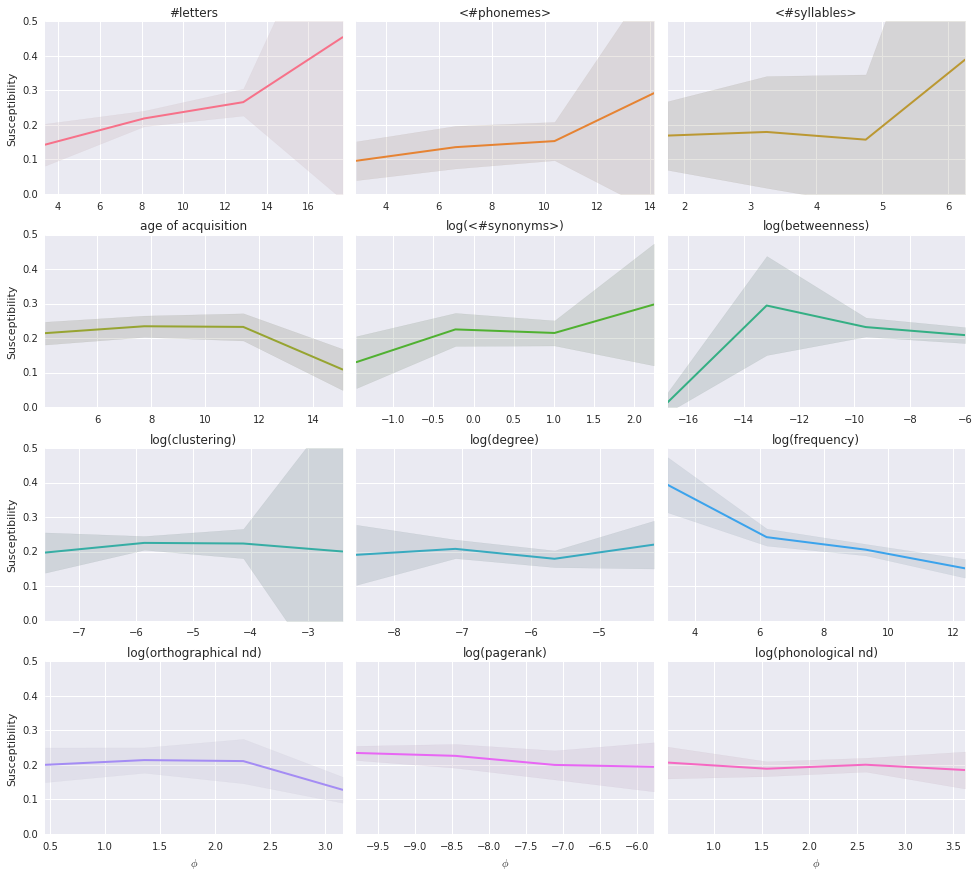

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

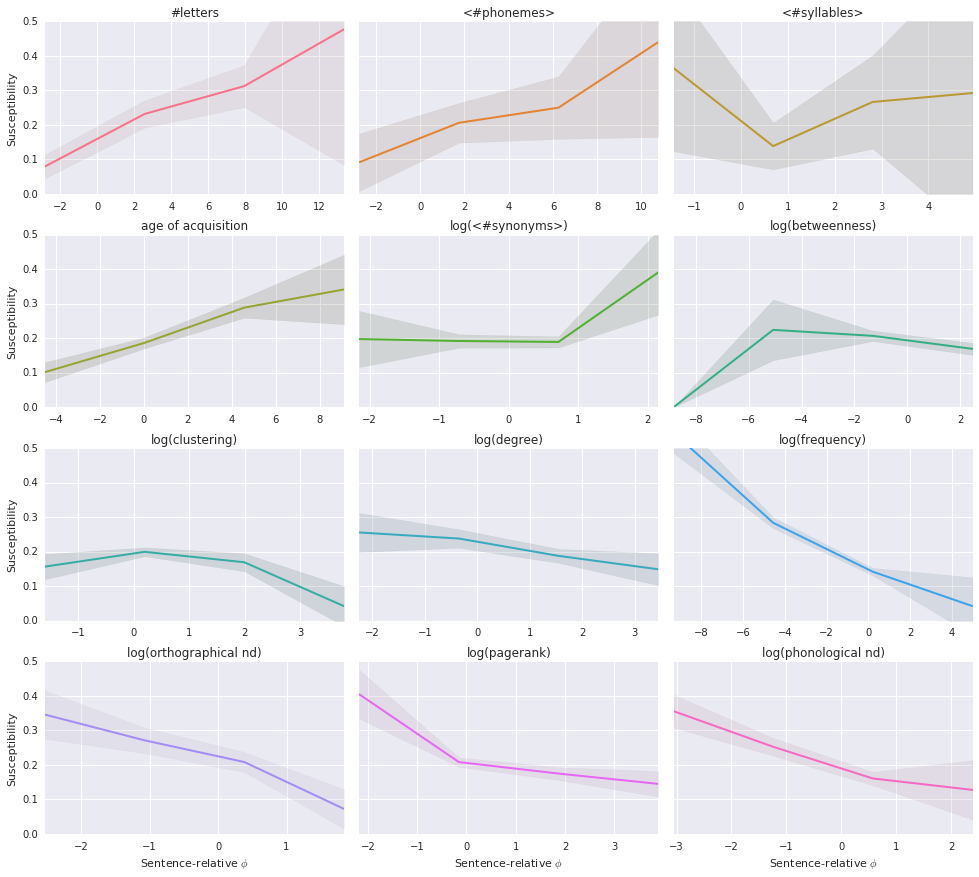

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

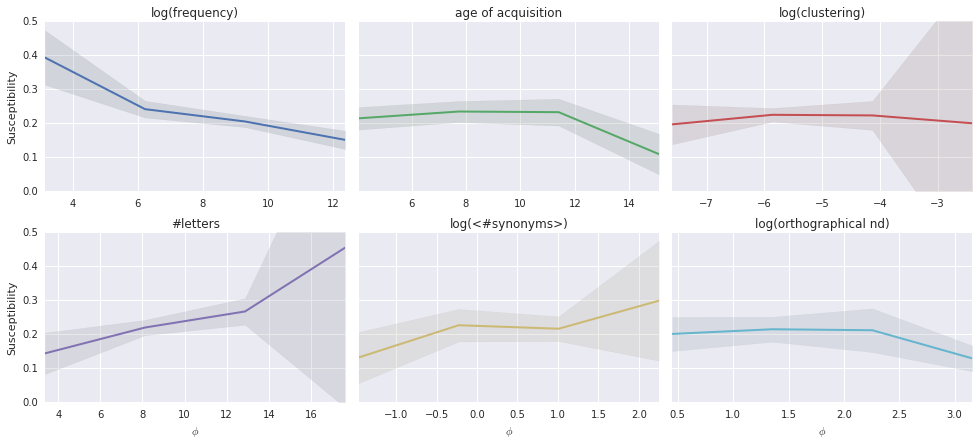

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

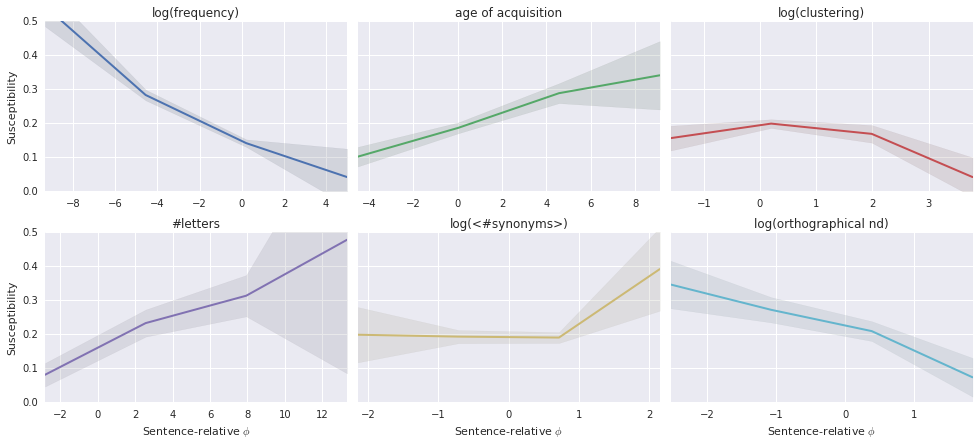

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

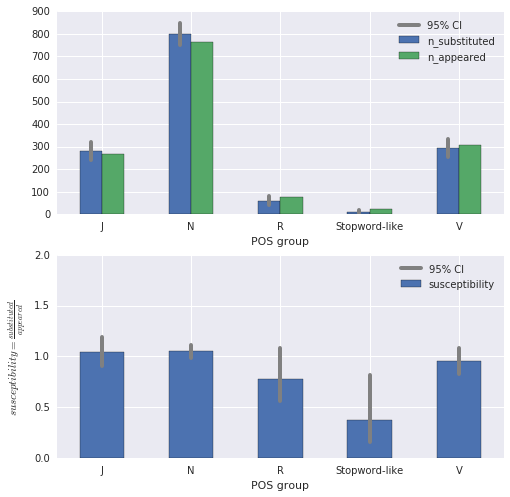

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

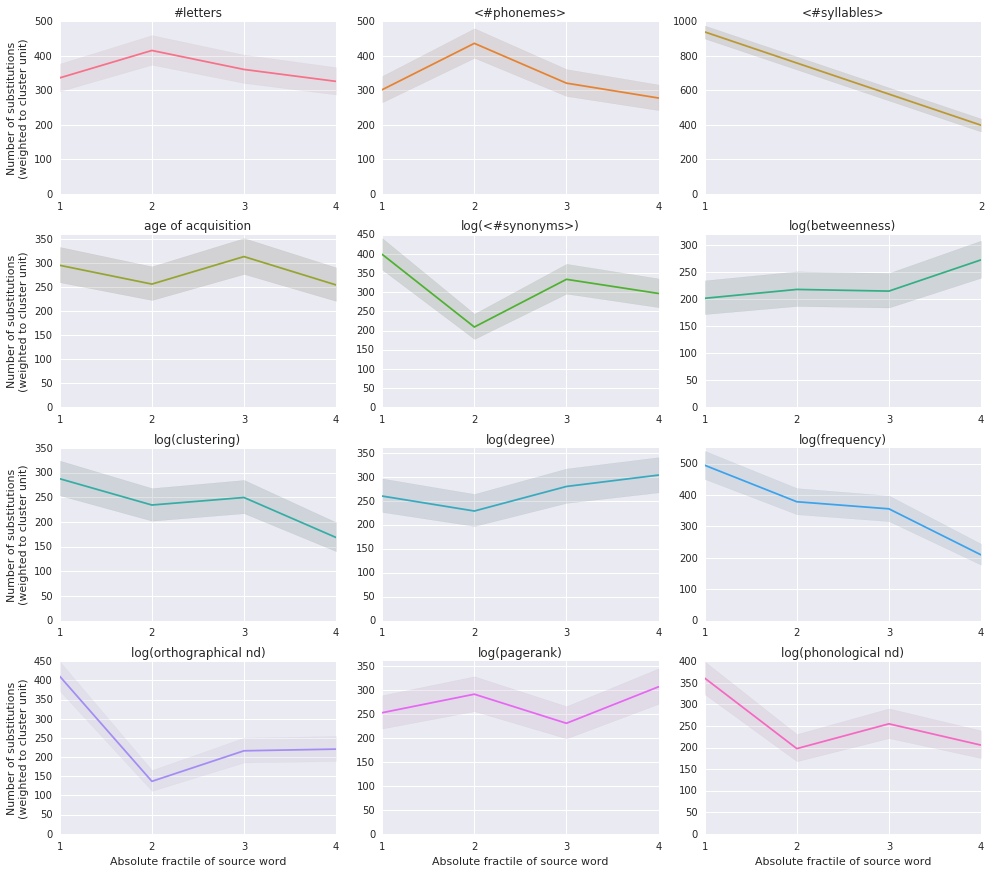

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

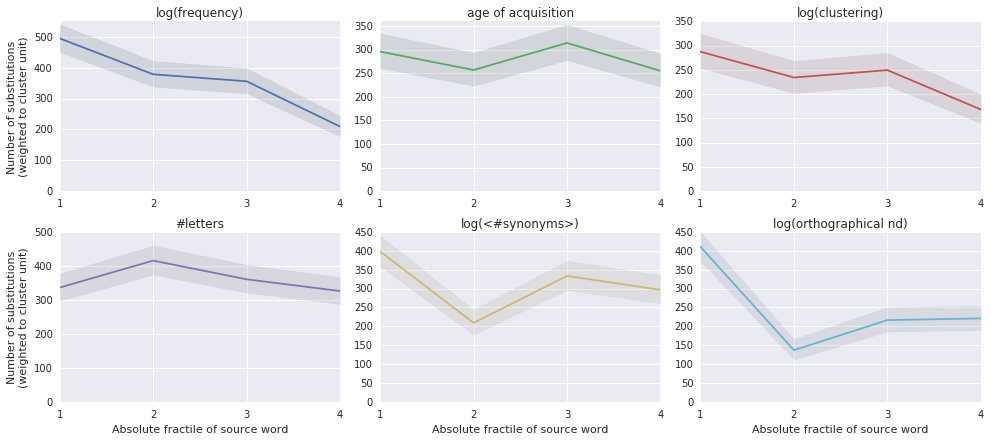

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (  105 of 19524) |                    | Elapsed Time: 0:00:01 ETA:  0:03:05

  1% (  211 of 19524) |                    | Elapsed Time: 0:00:02 ETA:  0:03:03

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:02 ETA:  0:03:05

  1% (  351 of 19524) |                    | Elapsed Time: 0:00:03 ETA:  0:03:03

  2% (  453 of 19524) |                    | Elapsed Time: 0:00:04 ETA:  0:03:04

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:04 ETA:  0:03:04

  3% (  598 of 19524) |                    | Elapsed Time: 0:00:05 ETA:  0:03:01

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:06 ETA:  0:02:56

  4% (  843 of 19524) |                    | Elapsed Time: 0:00:07 ETA:  0:02:54

  4% (  940 of 19524) |                    | Elapsed Time: 0:00:08 ETA:  0:02:55

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:09 ETA:  0:02:57

  5% ( 1062 of 19524) |#                   | Elapsed Time: 0:00:10 ETA:  0:03:02

  5% ( 1147 of 19524) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:05

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:12 ETA:  0:03:08

  6% ( 1306 of 19524) |#                   | Elapsed Time: 0:00:13 ETA:  0:03:14

  7% ( 1395 of 19524) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:18

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:14 ETA:  0:03:20

  7% ( 1561 of 19524) |#                   | Elapsed Time: 0:00:15 ETA:  0:03:23

  8% ( 1654 of 19524) |#                   | Elapsed Time: 0:00:16 ETA:  0:03:24

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:17 ETA:  0:03:21

  9% ( 1805 of 19524) |#                   | Elapsed Time: 0:00:18 ETA:  0:03:17

  9% ( 1899 of 19524) |#                   | Elapsed Time: 0:00:19 ETA:  0:03:13

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:20 ETA:  0:03:10

 10% ( 2051 of 19524) |##                  | Elapsed Time: 0:00:21 ETA:  0:03:06

 11% ( 2151 of 19524) |##                  | Elapsed Time: 0:00:22 ETA:  0:03:02

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:00:22 ETA:  0:03:01

 11% ( 2293 of 19524) |##                  | Elapsed Time: 0:00:23 ETA:  0:03:00

 12% ( 2373 of 19524) |##                  | Elapsed Time: 0:00:24 ETA:  0:03:03

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:00:25 ETA:  0:03:07

 12% ( 2518 of 19524) |##                  | Elapsed Time: 0:00:26 ETA:  0:03:11

 13% ( 2595 of 19524) |##                  | Elapsed Time: 0:00:27 ETA:  0:03:16

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:00:28 ETA:  0:03:11

 14% ( 2781 of 19524) |##                  | Elapsed Time: 0:00:29 ETA:  0:03:11

 14% ( 2870 of 19524) |##                  | Elapsed Time: 0:00:30 ETA:  0:03:13

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:00:31 ETA:  0:03:14

 15% ( 3017 of 19524) |###                 | Elapsed Time: 0:00:32 ETA:  0:03:15

 15% ( 3098 of 19524) |###                 | Elapsed Time: 0:00:33 ETA:  0:03:14

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:00:33 ETA:  0:03:06

 16% ( 3259 of 19524) |###                 | Elapsed Time: 0:00:34 ETA:  0:03:03

 17% ( 3334 of 19524) |###                 | Elapsed Time: 0:00:35 ETA:  0:03:02

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:00:36 ETA:  0:03:11

 17% ( 3510 of 19524) |###                 | Elapsed Time: 0:00:37 ETA:  0:03:09

 18% ( 3603 of 19524) |###                 | Elapsed Time: 0:00:38 ETA:  0:03:06

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:00:39 ETA:  0:03:04

 19% ( 3754 of 19524) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:59

 19% ( 3848 of 19524) |###                 | Elapsed Time: 0:00:41 ETA:  0:03:00

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:00:42 ETA:  0:02:57

 20% ( 3999 of 19524) |####                | Elapsed Time: 0:00:43 ETA:  0:02:50

 20% ( 4093 of 19524) |####                | Elapsed Time: 0:00:44 ETA:  0:02:45

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:00:44 ETA:  0:02:44

 21% ( 4266 of 19524) |####                | Elapsed Time: 0:00:45 ETA:  0:02:36

 22% ( 4369 of 19524) |####                | Elapsed Time: 0:00:46 ETA:  0:02:33

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:00:46 ETA:  0:02:33

 23% ( 4508 of 19524) |####                | Elapsed Time: 0:00:47 ETA:  0:02:26

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:00:49 ETA:  0:02:19

 24% ( 4747 of 19524) |####                | Elapsed Time: 0:00:50 ETA:  0:02:14

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:00:51 ETA:  0:02:05

 25% ( 4963 of 19524) |#####               | Elapsed Time: 0:00:52 ETA:  0:02:12

 25% ( 5061 of 19524) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:13

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:00:53 ETA:  0:02:11

 26% ( 5226 of 19524) |#####               | Elapsed Time: 0:00:54 ETA:  0:02:15

 27% ( 5315 of 19524) |#####               | Elapsed Time: 0:00:55 ETA:  0:02:20

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:00:56 ETA:  0:02:19

 28% ( 5476 of 19524) |#####               | Elapsed Time: 0:00:57 ETA:  0:02:19

 28% ( 5573 of 19524) |#####               | Elapsed Time: 0:00:58 ETA:  0:02:26

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:00:58 ETA:  0:02:25

 28% ( 5647 of 19524) |#####               | Elapsed Time: 0:01:00 ETA:  0:02:50

 29% ( 5740 of 19524) |#####               | Elapsed Time: 0:01:01 ETA:  0:02:51

 29% ( 5814 of 19524) |#####               | Elapsed Time: 0:01:02 ETA:  0:02:57

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:02 ETA:  0:03:03

 30% ( 5954 of 19524) |######              | Elapsed Time: 0:01:03 ETA:  0:03:00

 30% ( 6045 of 19524) |######              | Elapsed Time: 0:01:05 ETA:  0:03:00

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:05 ETA:  0:03:05

 32% ( 6264 of 19524) |######              | Elapsed Time: 0:01:06 ETA:  0:02:40

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:01:07 ETA:  0:02:29

 32% ( 6442 of 19524) |######              | Elapsed Time: 0:01:08 ETA:  0:02:00

 33% ( 6539 of 19524) |######              | Elapsed Time: 0:01:09 ETA:  0:01:58

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:01:09 ETA:  0:01:48

 34% ( 6708 of 19524) |######              | Elapsed Time: 0:01:10 ETA:  0:01:41

 34% ( 6815 of 19524) |######              | Elapsed Time: 0:01:11 ETA:  0:01:38

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:34

 35% ( 6916 of 19524) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:38

 35% ( 7002 of 19524) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:55

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:01:14 ETA:  0:02:05

 36% ( 7177 of 19524) |#######             | Elapsed Time: 0:01:15 ETA:  0:02:03

 37% ( 7280 of 19524) |#######             | Elapsed Time: 0:01:16 ETA:  0:02:00

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:17 ETA:  0:02:05

 37% ( 7417 of 19524) |#######             | Elapsed Time: 0:01:18 ETA:  0:02:11

 38% ( 7548 of 19524) |#######             | Elapsed Time: 0:01:19 ETA:  0:02:04

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:01:19 ETA:  0:02:03

 39% ( 7661 of 19524) |#######             | Elapsed Time: 0:01:20 ETA:  0:01:59

 39% ( 7759 of 19524) |#######             | Elapsed Time: 0:01:21 ETA:  0:01:55

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:01:21 ETA:  0:01:52

 40% ( 7909 of 19524) |########            | Elapsed Time: 0:01:22 ETA:  0:01:51

 41% ( 8007 of 19524) |########            | Elapsed Time: 0:01:23 ETA:  0:01:51

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:01:24 ETA:  0:01:47

 41% ( 8169 of 19524) |########            | Elapsed Time: 0:01:25 ETA:  0:01:41

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:01:26 ETA:  0:01:41

 43% ( 8406 of 19524) |########            | Elapsed Time: 0:01:27 ETA:  0:01:37

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:01:28 ETA:  0:01:30

 44% ( 8657 of 19524) |########            | Elapsed Time: 0:01:29 ETA:  0:01:26

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:01:30 ETA:  0:01:19

 45% ( 8871 of 19524) |#########           | Elapsed Time: 0:01:31 ETA:  0:01:26

 45% ( 8971 of 19524) |#########           | Elapsed Time: 0:01:32 ETA:  0:01:29

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:01:33 ETA:  0:01:27

 46% ( 9153 of 19524) |#########           | Elapsed Time: 0:01:34 ETA:  0:01:23

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:23

 48% ( 9392 of 19524) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:21

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:24

 49% ( 9627 of 19524) |#########           | Elapsed Time: 0:01:38 ETA:  0:01:17

 49% ( 9730 of 19524) |#########           | Elapsed Time: 0:01:39 ETA:  0:01:15

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:17

 50% ( 9857 of 19524) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:24

 50% ( 9957 of 19524) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:24

 51% (10007 of 19524) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:27

 51% (10115 of 19524) |##########          | Elapsed Time: 0:01:43 ETA:  0:01:29

 52% (10217 of 19524) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:29

 52% (10251 of 19524) |##########          | Elapsed Time: 0:01:44 ETA:  0:01:29

 52% (10331 of 19524) |##########          | Elapsed Time: 0:01:45 ETA:  0:01:36

 53% (10450 of 19524) |##########          | Elapsed Time: 0:01:46 ETA:  0:01:30

 53% (10495 of 19524) |##########          | Elapsed Time: 0:01:47 ETA:  0:01:30

 54% (10607 of 19524) |##########          | Elapsed Time: 0:01:48 ETA:  0:01:24

 54% (10716 of 19524) |##########          | Elapsed Time: 0:01:49 ETA:  0:01:21

 55% (10739 of 19524) |###########         | Elapsed Time: 0:01:49 ETA:  0:01:19

 55% (10851 of 19524) |###########         | Elapsed Time: 0:01:50 ETA:  0:01:17

 56% (10949 of 19524) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:17

 56% (10983 of 19524) |###########         | Elapsed Time: 0:01:51 ETA:  0:01:18

 56% (11098 of 19524) |###########         | Elapsed Time: 0:01:52 ETA:  0:01:08

 57% (11204 of 19524) |###########         | Elapsed Time: 0:01:53 ETA:  0:01:10

 57% (11227 of 19524) |###########         | Elapsed Time: 0:01:54 ETA:  0:01:10

 58% (11334 of 19524) |###########         | Elapsed Time: 0:01:55 ETA:  0:01:10

 58% (11431 of 19524) |###########         | Elapsed Time: 0:01:56 ETA:  0:01:12

 58% (11471 of 19524) |###########         | Elapsed Time: 0:01:56 ETA:  0:01:08

 59% (11587 of 19524) |###########         | Elapsed Time: 0:01:57 ETA:  0:01:07

 59% (11675 of 19524) |###########         | Elapsed Time: 0:01:58 ETA:  0:01:08

 60% (11715 of 19524) |############        | Elapsed Time: 0:01:58 ETA:  0:01:07

 60% (11831 of 19524) |############        | Elapsed Time: 0:01:59 ETA:  0:01:06

 61% (11959 of 19524) |############        | Elapsed Time: 0:02:00 ETA:  0:01:00

 61% (12062 of 19524) |############        | Elapsed Time: 0:02:01 ETA:  0:01:00

 62% (12183 of 19524) |############        | Elapsed Time: 0:02:02 ETA:  0:00:53

 62% (12203 of 19524) |############        | Elapsed Time: 0:02:03 ETA:  0:00:55

 63% (12302 of 19524) |############        | Elapsed Time: 0:02:04 ETA:  0:00:58

 63% (12405 of 19524) |############        | Elapsed Time: 0:02:05 ETA:  0:00:53

 63% (12447 of 19524) |############        | Elapsed Time: 0:02:05 ETA:  0:00:54

 64% (12551 of 19524) |############        | Elapsed Time: 0:02:06 ETA:  0:00:56

 64% (12643 of 19524) |############        | Elapsed Time: 0:02:07 ETA:  0:01:02

 65% (12691 of 19524) |#############       | Elapsed Time: 0:02:08 ETA:  0:01:03

 65% (12802 of 19524) |#############       | Elapsed Time: 0:02:09 ETA:  0:01:00

 66% (12935 of 19524) |#############       | Elapsed Time: 0:02:10 ETA:  0:00:59

 66% (13028 of 19524) |#############       | Elapsed Time: 0:02:11 ETA:  0:00:59

 67% (13140 of 19524) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:56

 67% (13179 of 19524) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:54

 68% (13300 of 19524) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:48

 68% (13423 of 19524) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:42

 69% (13540 of 19524) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:40

 69% (13638 of 19524) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:45

 70% (13667 of 19524) |##############      | Elapsed Time: 0:02:17 ETA:  0:00:44

 70% (13768 of 19524) |##############      | Elapsed Time: 0:02:18 ETA:  0:00:41

 70% (13860 of 19524) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:45

 71% (13911 of 19524) |##############      | Elapsed Time: 0:02:19 ETA:  0:00:44

 71% (14016 of 19524) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:48

 72% (14115 of 19524) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:48

 72% (14126 of 19524) |##############      | Elapsed Time: 0:02:22 ETA:  0:01:22

 72% (14155 of 19524) |##############      | Elapsed Time: 0:02:23 ETA:  0:01:30

 73% (14263 of 19524) |##############      | Elapsed Time: 0:02:24 ETA:  0:01:25

 73% (14399 of 19524) |##############      | Elapsed Time: 0:02:25 ETA:  0:01:19

 74% (14492 of 19524) |##############      | Elapsed Time: 0:02:26 ETA:  0:01:18

 74% (14586 of 19524) |##############      | Elapsed Time: 0:02:27 ETA:  0:01:18

 75% (14644 of 19524) |###############     | Elapsed Time: 0:02:27 ETA:  0:01:23

 75% (14770 of 19524) |###############     | Elapsed Time: 0:02:28 ETA:  0:01:12

 76% (14888 of 19524) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:33

 76% (14987 of 19524) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:34

 77% (15094 of 19524) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:36

 77% (15132 of 19524) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:35

 78% (15242 of 19524) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:30

 78% (15349 of 19524) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:26

 78% (15376 of 19524) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:24

 79% (15485 of 19524) |###############     | Elapsed Time: 0:02:35 ETA:  0:00:27

 79% (15580 of 19524) |###############     | Elapsed Time: 0:02:36 ETA:  0:00:31

 80% (15620 of 19524) |################    | Elapsed Time: 0:02:37 ETA:  0:00:30

 80% (15714 of 19524) |################    | Elapsed Time: 0:02:38 ETA:  0:00:30

 80% (15812 of 19524) |################    | Elapsed Time: 0:02:39 ETA:  0:00:32

 81% (15864 of 19524) |################    | Elapsed Time: 0:02:39 ETA:  0:00:31

 81% (15978 of 19524) |################    | Elapsed Time: 0:02:40 ETA:  0:00:29

 82% (16078 of 19524) |################    | Elapsed Time: 0:02:41 ETA:  0:00:30

 82% (16108 of 19524) |################    | Elapsed Time: 0:02:41 ETA:  0:00:28

 83% (16205 of 19524) |################    | Elapsed Time: 0:02:42 ETA:  0:00:31

 83% (16306 of 19524) |################    | Elapsed Time: 0:02:43 ETA:  0:00:28

 83% (16352 of 19524) |################    | Elapsed Time: 0:02:44 ETA:  0:00:28

 84% (16457 of 19524) |################    | Elapsed Time: 0:02:45 ETA:  0:00:24

 85% (16596 of 19524) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:16

 85% (16706 of 19524) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:16

 86% (16805 of 19524) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:16

 86% (16840 of 19524) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:17

 86% (16942 of 19524) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:15

 87% (17056 of 19524) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:11

 87% (17084 of 19524) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:09

 88% (17187 of 19524) |#################   | Elapsed Time: 0:02:52 ETA:  0:00:09

 88% (17290 of 19524) |#################   | Elapsed Time: 0:02:53 ETA:  0:00:13

 88% (17328 of 19524) |#################   | Elapsed Time: 0:02:53 ETA:  0:00:14

 89% (17436 of 19524) |#################   | Elapsed Time: 0:02:54 ETA:  0:00:13

 89% (17548 of 19524) |#################   | Elapsed Time: 0:02:55 ETA:  0:00:09

 90% (17572 of 19524) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:08

 90% (17678 of 19524) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:06

 91% (17785 of 19524) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:07

 91% (17816 of 19524) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:07

 91% (17926 of 19524) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:04

 92% (18029 of 19524) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:03

 92% (18060 of 19524) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:02

 93% (18160 of 19524) |##################  | Elapsed Time: 0:03:01 ETA:  0:00:03

 93% (18276 of 19524) |##################  | Elapsed Time: 0:03:02 ETA:  0:00:01

 93% (18304 of 19524) |##################  | Elapsed Time: 0:03:02 ETA:  0:00:00

 94% (18417 of 19524) |##################  | Elapsed Time: 0:03:03 ETA:  0:00:00

 94% (18527 of 19524) |##################  | Elapsed Time: 0:03:04 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:03:04 ETA:  0:00:00

 95% (18663 of 19524) |################### | Elapsed Time: 0:03:05 ETA:  0:00:00

 96% (18765 of 19524) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:03:07 ETA:  0:00:00

 96% (18896 of 19524) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

 97% (19006 of 19524) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

 98% (19148 of 19524) |################### | Elapsed Time: 0:03:10 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:03:11 ETA:  0:00:00

 99% (19383 of 19524) |################### | Elapsed Time: 0:03:12 ETA:  0:00:00

 99% (19500 of 19524) |################### | Elapsed Time: 0:03:13 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:03:13 Time: 0:03:13


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

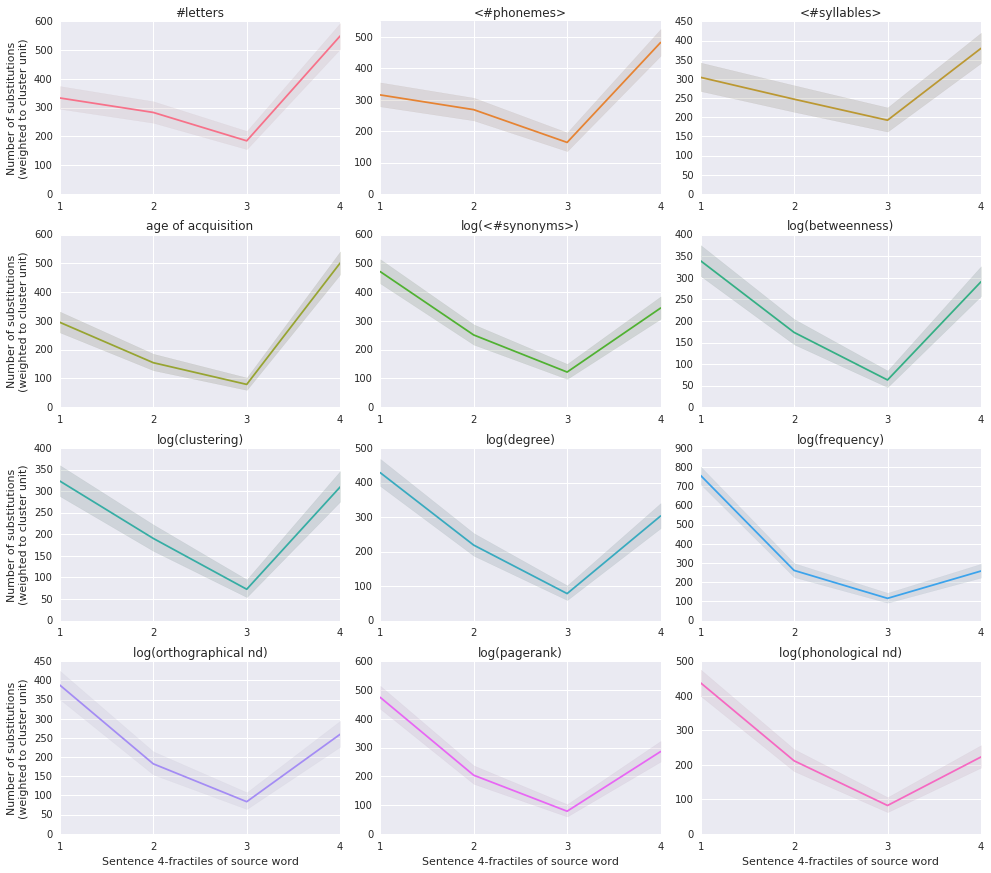

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

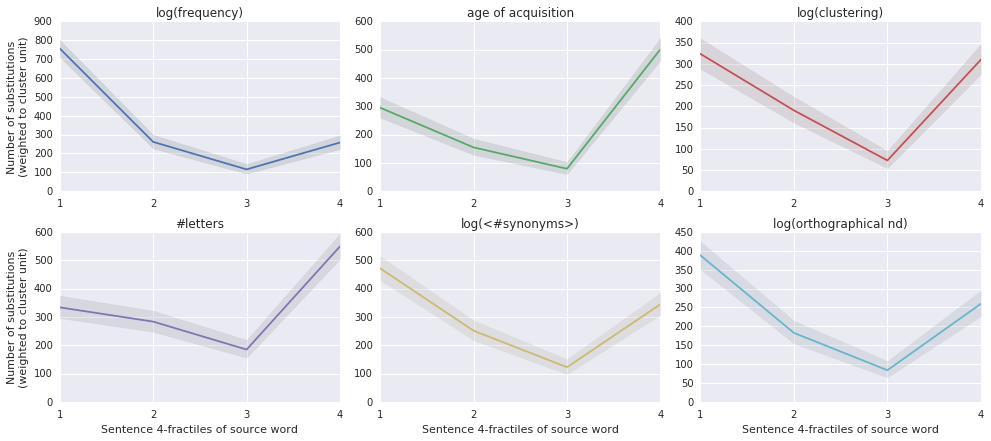

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)